# HACKATHON CAIXABANK TECH NUWE

Nombre: Joan Nigorra Barceló

Alias: Jonkai

Email: jnigorra@gmail.com

LinkedIn: https://www.linkedin.com/in/jnigorra/

In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import datetime as dt
import urllib.request, json
import os
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
plt.style.use('bmh')

In [5]:
df = pd.read_csv('train.csv')
print('The shape of our dataframe is:', df.shape)
df.head()

The shape of our dataframe is: (6554, 8)


,Date,Open,High,Low,Close,Adj Close,Volume,Target
0,1994-01-03,3615.199951,3654.699951,3581.000000,3654.500000,3654.496338,0.0,0
1,1994-01-04,3654.500000,3675.500000,3625.100098,3630.300049,3630.296387,0.0,1
2,1994-01-05,3625.199951,3625.199951,3583.399902,3621.199951,3621.196289,0.0,1
3,1994-01-06,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1994-01-07,3621.199951,3644.399902,3598.699951,3636.399902,3636.396240,0.0,1


In [7]:
# Descriptive statistics for each column
df.describe()

,Open,High,Low,Close,Adj Close,Volume,Target
count,6421.000000,6421.000000,6421.000000,6421.000000,6421.000000,6.421000e+03,6554.000000
mean,8936.540448,9005.235576,8858.340567,8934.978558,8934.970624,8.218074e+07,0.516936
std,2732.102441,2749.009324,2712.511028,2731.032625,2731.030170,1.231845e+08,0.499751
min,2865.100098,2877.300049,2833.600098,2865.100098,2865.097168,0.000000e+00,0.000000
25%,7732.399902,7817.200195,7641.500000,7727.799805,7727.791992,0.000000e+00,0.000000
50%,9329.700195,9404.599609,9243.000000,9331.000000,9331.000000,1.966000e+05,1.000000
75%,10525.500000,10590.299805,10441.200195,10523.400391,10523.400391,1.773980e+08,1.000000
max,15999.200195,16040.400391,15868.599609,15945.700195,15945.683594,7.894902e+08,1.000000


Podemos ver que hay valores nulos, los tenemos que limpiar. A medida que voy haciendo capas de limpieza voy poninendo df_cleanX (df_clean1, df_clean2, ...)

In [8]:
df_clean1 = df.dropna()
df_clean1.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Target
0,1994-01-03,3615.199951,3654.699951,3581.000000,3654.500000,3654.496338,0.0,0
1,1994-01-04,3654.500000,3675.500000,3625.100098,3630.300049,3630.296387,0.0,1
2,1994-01-05,3625.199951,3625.199951,3583.399902,3621.199951,3621.196289,0.0,1
4,1994-01-07,3621.199951,3644.399902,3598.699951,3636.399902,3636.396240,0.0,1
5,1994-01-10,3655.199951,3678.199951,3655.199951,3660.600098,3660.596436,0.0,1


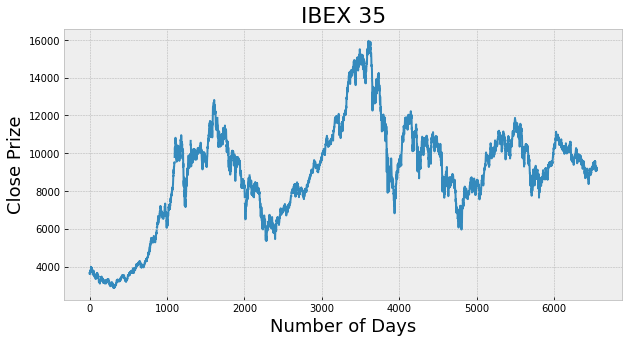

In [17]:
# Basic Initial Plots
plt.figure(figsize = (10,5))
plt.plot(df['Close'])
#plt.xticks(range(0, df_clean1.shape[0], 100), df['Date'].loc[::100], rotation = 45)
plt.title('IBEX 35', fontsize = 22)
plt.xlabel('Number of Days', fontsize = 18)
plt.ylabel('Close Prize', fontsize = 18)
plt.show()

In [18]:
df_close = df_clean1[['Date', 'Close', 'Target']]
df_close.head()

,Date,Close,Target
0,1994-01-03,3654.500000,0
1,1994-01-04,3630.300049,1
2,1994-01-05,3621.199951,1
4,1994-01-07,3636.399902,1
5,1994-01-10,3660.600098,1


In [20]:
#Split the data into training and validation
features = df_close[['Close']]
labels = df_close[['Target']]
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.1) 

In [22]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Validation Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (5778, 1)
Training Labels Shape: (5778, 1)
Validation Features Shape: (643, 1)
Testing Labels Shape: (643, 1)


In [24]:
# Saving feature names for later use
feature_list = list(df_close.columns)

In [28]:
from sklearn.ensemble import RandomForestRegressor

In [92]:
rf = RandomForestRegressor(n_estimators = 1000)
rf.fit(train_features, train_labels)

C:\Users\joan.nigorra\AppData\Local\Temp\ipykernel_31188\148747763.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(train_features, train_labels)


RandomForestRegressor(n_estimators=1000)

In [93]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

In [97]:
# Calculate the absolute errors
predictions_vector = np.reshape(predictions, -1)
predictions_binary_vec = []
predictions_vec = []
for i in range (len(predictions_vector)):
    predictions_vec.append(predictions[i])
    if predictions[i] > 0.5:
        predictions_binary_vec.append(1)
    else:
        predictions_binary_vec.append(0)
print("---> 30 primeras predicciones", predictions_vec[0:30])
print("---> 30 primeras predicciones aproximando a 0 o 1:", predictions_binary_vec[0:30])
test_labels_vec = test_labels['Target'].values.tolist()
#print(test_labels_vec)

---> 30 primeras predicciones [0.911, 0.329, 0.3676666666666667, 0.01, 0.732, 0.734, 0.361, 0.311, 0.788, 0.741, 0.663, 0.34235, 0.041, 0.885, 0.017, 0.69, 0.352, 0.999, 0.889, 0.9403, 0.765, 0.015, 0.666, 0.107, 0.0, 0.995, 0.336, 0.7433166666666666, 0.07608333333333332, 0.24]
---> 30 primeras predicciones aproximando a 0 o 1: [1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0]


In [91]:
errors_binary_vec = []
errors_vec = []
for q in range(len(test_labels_vec)):
    error = abs(test_labels_vec[q] - predictions_vec[q])
    errors_vec.append(error)
    error_binary = abs(test_labels_vec[q] - predictions_binary_vec[q])
    errors_binary_vec.append(error_binary)
#print(errors_vec)
#print(errors_binary_vec)

In [89]:
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors_vec), 3), '')

Mean Absolute Error: 0.497 


In [90]:
print('Mean Absolute Error:', round(np.mean(errors_binary_vec), 3), '')

Mean Absolute Error: 0.502 


Vemos que el error absoluto, tanto si aproximamos la predición a 0 o 1, como si no, es aprox 0.5. Esto no es bueno ya que al ser la solución binaria, es igual a tomar decisiones tirando una moneda al aire. 50% de probabilidad de adivinar si va a subir o bajar el valor los próximos tres días. (Todo eso suponiendo que lo que he ehcho esta bien, que lo dudo jejeje)

## Versión 2

Excluimos Volume

In [99]:
df_full = df_clean1[['Date','Open', 'High', 'Low', 'Close', 'Adj Close', 'Target']]
df_full.head()

,Date,Open,High,Low,Close,Adj Close,Target
0,1994-01-03,3615.199951,3654.699951,3581.000000,3654.500000,3654.496338,0
1,1994-01-04,3654.500000,3675.500000,3625.100098,3630.300049,3630.296387,1
2,1994-01-05,3625.199951,3625.199951,3583.399902,3621.199951,3621.196289,1
4,1994-01-07,3621.199951,3644.399902,3598.699951,3636.399902,3636.396240,1
5,1994-01-10,3655.199951,3678.199951,3655.199951,3660.600098,3660.596436,1


In [100]:
#Split the data into training and validation
features_full = df_full[['Open', 'High', 'Low', 'Close', 'Adj Close']]
labels_full = df_full[['Target']]
train_full, test_full, train_labels_full, test_labels_full = train_test_split(features_full, labels_full, test_size = 0.1) 

In [101]:
rf_full = RandomForestRegressor(n_estimators = 1000)
rf_full.fit(train_full, train_labels_full)

C:\Users\joan.nigorra\AppData\Local\Temp\ipykernel_31188\1863535910.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_full.fit(train_full, train_labels_full)


RandomForestRegressor(n_estimators=1000)

In [102]:
# Use the forest's predict method on the test data
predictions_full = rf_full.predict(test_full)

In [103]:
# Calculate the absolute errors
predict_vector = np.reshape(predictions_full, -1)
predict_binary_vec = []
predict_vec = []
for i in range (len(predict_vector)):
    predict_vec.append(predictions_full[i])
    if predictions_full[i] > 0.5:
        predict_binary_vec.append(1)
    else:
        predict_binary_vec.append(0)
print("---> 30 primeras predicciones", predict_vec[0:30])
print("---> 30 primeras predicciones aproximando a 0 o 1:", predict_binary_vec[0:30])
test_labels_vec_full = test_labels_full['Target'].values.tolist()
#print(test_labels_vec)

---> 30 primeras predicciones [0.107, 0.407, 0.854, 0.722, 0.505, 0.402, 0.457, 0.408, 0.492, 0.219, 0.476, 0.426, 0.545, 0.913, 0.121, 0.942, 0.919, 0.089, 0.919, 0.361, 0.874, 0.401, 0.685, 0.699, 0.163, 0.541, 0.615, 0.756, 0.662, 0.532]
---> 30 primeras predicciones aproximando a 0 o 1: [0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1]


In [104]:
err_binary_vec = []
err_vec = []
for q in range(len(test_labels_vec_full)):
    err = abs(test_labels_vec_full[q] - predict_vec[q])
    err_vec.append(err)
    err_binary = abs(test_labels_vec_full[q] - predict_binary_vec[q])
    err_binary_vec.append(err_binary)
#print(errors_vec)
#print(errors_binary_vec)

In [105]:
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(err_vec), 3), '')

Mean Absolute Error: 0.485 


In [106]:
print('Mean Absolute Error:', round(np.mean(err_binary_vec), 3), '')

Mean Absolute Error: 0.493 


## K-means

In [3]:
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [4]:
features_full, labels_full = make_blobs(
n_samples = 200, centers = 2, cluster_std = 2.75, random_state = 42)

In [5]:
scaler = StandardScaler()
scaled_features  =scaler.fit_transform(features_full)

In [6]:
scaled_features[:5]

array([[-0.16911688, -1.18949511],
       [ 0.95951447, -1.33149804],
       [ 0.78395805, -0.50559701],
       [-1.38628576,  1.07487304],
       [ 0.93494981, -1.20403126]])

In [7]:
kmeans = KMeans(
    init = "random", 
    n_clusters = 2,
    n_init = 10,
    max_iter = 300,
    random_state = 42)

In [8]:
kmeans.fit(scaled_features)

C:\Users\joan.nigorra\Anaconda3\envs\caixabank\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(init='random', n_clusters=2, random_state=42)

In [11]:
# The lowest SSE value
kmeans.inertia_

129.38411431893388

In [12]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[-0.7929145 ,  0.80345869],
       [ 0.84196076, -0.85315717]])

In [13]:
# The number of iterations required to converge
kmeans.n_iter_

4

In [14]:
kmeans.labels_[:5]

array([1, 1, 1, 0, 1])

In [17]:
kmeans_kwargs = {
    "init": "random", 
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

C:\Users\joan.nigorra\Anaconda3\envs\caixabank\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\joan.nigorra\Anaconda3\envs\caixabank\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\joan.nigorra\Anaconda3\envs\caixabank\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\joan.nigorra\Anaconda3\envs\caixabank\lib\site-packages\sklea

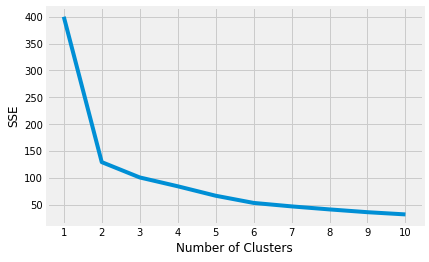

In [20]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

Kmeans podría funcionar, porque nos da 2 clusters, que es lo que queremos, que diferencie binario 1 y 0. (No tengo tiempo para mas)